In [1]:
print('Hello world')
from matplotlib import pyplot as plt
import numpy as np

Hello world


In [2]:
# example is taken from: https://www.youtube.com/watch?v=7eh4d6sabA0&ab_channel=ProgrammingwithMosh
import pandas as pd
df = pd.read_csv('vgsales.csv')
df.shape

(16598, 11)

In [3]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
df.head(10) #print first five rows

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [10]:
feature = np.array[df['JP_Sales']]

TypeError: 'builtin_function_or_method' object is not subscriptable

In [5]:
y = df['JP_Sales']
# y.head()
mean_y = np.mean(y)
print ("mean_y: %f" %(mean_y))

mean_y: 0.077782


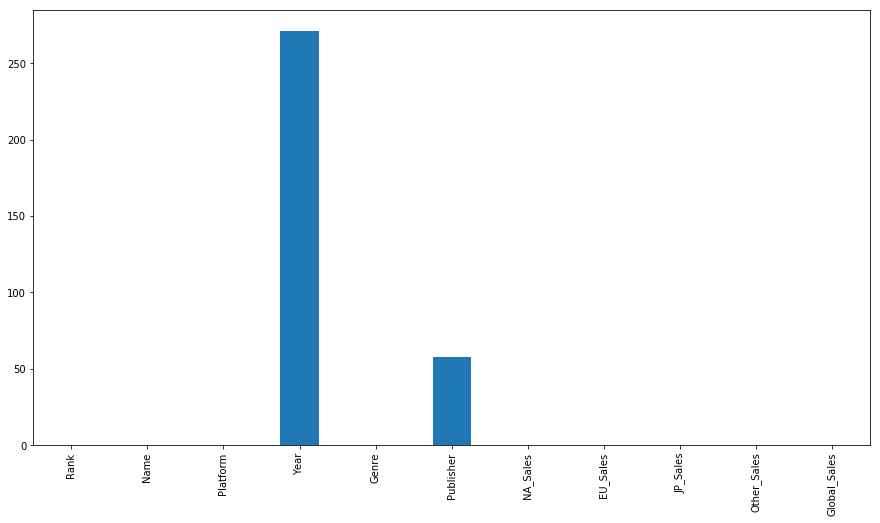

In [40]:
df_missing_count = df.isnull().sum() # Values of -1 is missing data
plt.rcParams['figure.figsize'] = (15,8)
df_missing_count.plot.bar()
plt.show()

columns_multi ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


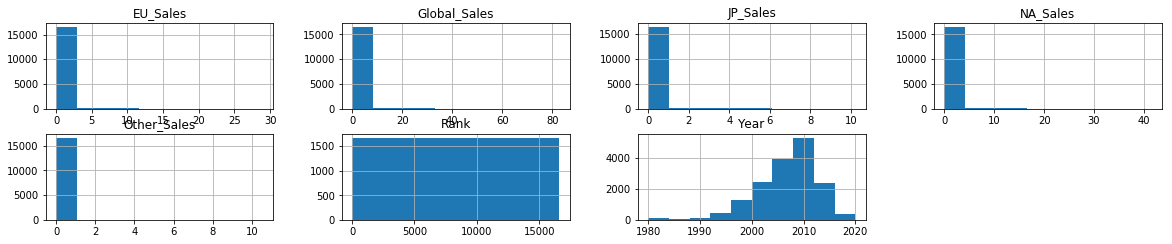

In [45]:
df.columns
columns_multi = [x for x in list(df.columns)]
print ("columns_multi", columns_multi)
plt.rcParams['figure.figsize'] = (20,20)
names = columns_multi
df.hist(layout = (10,4), column = columns_multi)
plt.show()

In [6]:
music_data = pd.read_csv('music.csv')

In [9]:
music_data.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


In [10]:
#clean the data
# input and output splitting

In [60]:
# music_data drop method carefull
# X is input, y= prediction
# sklean library
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = music_data.drop(['genre'],axis=1)
y = music_data['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#train a model 
model = DecisionTreeClassifier()
# model.fit(X, y)
# prediction using the model
# predictions = model.predict([ [21,1], [22,0]])
# predictions
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
score

0.20000000000000001

In [63]:
# model save into a file and read

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals import joblib

# music_data = pd.read_csv('music.csv')
# X = music_data.drop(['genre'],axis=1)
# y = music_data['genre']

# model = DecisionTreeClassifier()
# model.fit(X, y)

# save the model into a file 
# joblib.dump(model, 'music-recommender.joblib')

# just read model (already trained)
model = joblib.load('music-recommender.joblib')
#predictions = model.predict([ [21,1], [22,0]])

predictions = model.predict([ [21,1] ])
predictions

array(['HipHop'], dtype=object)

In [64]:
# visualize the model 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

music_data = pd.read_csv('music.csv')
X = music_data.drop(['genre'],axis=1)
y = music_data['genre']

model = DecisionTreeClassifier()
model.fit(X, y)

tree.export_graphviz(model, out_file='musics-recommender.dot',
                    feature_names=['age', 'gender'],
                    class_names=sorted(y.unique()),
                    label='all',
                    rounded=True,
                    filled=True)

In [ ]:
import ROOT

In [1]:
class Complex:
    def __init__(self, realpart, imagpart):
        self.r = realpart
        self.i = imagpart


In [2]:
x = Complex(3.0, -4.5)

In [3]:
x.r

3.0

In [6]:
print("Real part is: %0.2f and imaginary part is: %0.2f"%(x.r, x.i))

Real part is: 3.00 and imaginary part is: -4.50


In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
import pandas as pd

In [17]:
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df = pd.read_csv('iris.data', header=None)

In [18]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
!ls

AutoEncoder              music-recommender.joblib sepal_vs_petal.pdf
Untitled.ipynb           music.csv                sepal_vs_petal.png
archive.zip              music.csv.zip            test
iris.data                musics-recommender.dot   vgsales.csv


In [7]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2021-10-26 08:25:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu... 128.195.10.252
Connecting to archive.ics.uci.edu|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2021-10-26 08:25:20 (33.6 MB/s) - ‘iris.data’ saved [4551/4551]



In [8]:
!ls

AutoEncoder              music-recommender.joblib test
Untitled.ipynb           music.csv                vgsales.csv
archive.zip              music.csv.zip
iris.data                musics-recommender.dot


In [20]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [21]:
y = df.iloc[0:100,4].values

In [22]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [23]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [24]:
X = df.iloc[0:100, [0,2]].values

In [68]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.grid(True)
plt.legend(loc='lower right')
plt.savefig('sepal_vs_petal.pdf')
# plt.show()

In [69]:
?np.where

In [70]:
from sklearn.linear_model import Perceptron

In [73]:
?plt.yticks

In [77]:
ppn = Perceptron(n_iter=10, eta0=0.1, random_state=0)

In [78]:
ppn.fit(X, y)

/Users/gkole/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=10, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [27]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the number of samples and n_features is the number of features.
           y : array-like, shape = [n_samples]
               Target values.
           Returns
           -------
           self : object
           """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [31]:
for _ in range(10):
    for a, b in zip(X, y):
        #print (a)
        #print (b)
        #print("xi =: %0.2f and target =: %0.2f"%(xi, target))
#         print("Real part is: %0.2f and imaginary part is: %0.2f"%(x.r, x.i))

SyntaxError: unexpected EOF while parsing (<ipython-input-31-ade1c4c34621>, line 6)

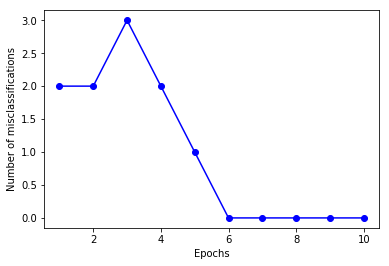

In [90]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, color='b', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [92]:
from matplotlib.colors import ListedColormap

In [93]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                     np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

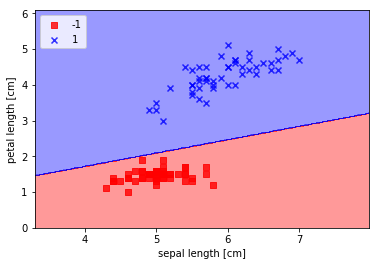

In [94]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [74]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

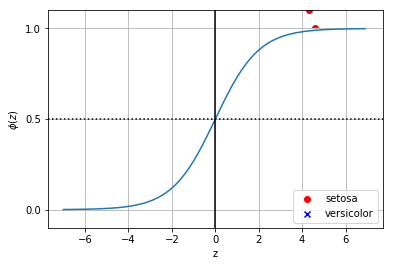

In [75]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

In [44]:
?np.meshgrid

In [43]:
from sklearn.cluster import AgglomerativeClustering

In [1]:
import numpy as np

In [3]:
?np.vstack

In [4]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
np.vstack((a,b))

array([[1, 2, 3],
       [2, 3, 4]])

In [7]:
np.hstack((a,b))

array([1, 2, 3, 2, 3, 4])

In [1]:
import seaborn as sns

In [4]:
?sns.barplot

In [1]:
hists_name = ['DY_l1_pt','DY_l1_eta','DY_l1_phi','DY_l2_pt','DY_l2_eta','DY_l2_phi','DY_z_pt','DY_z_eta','DY_z_phi','DY_z_mass']

In [8]:
print(hists_name[0])
#hists_name[1]:-3,
#hists_name[2]:-4,

DY_l1_pt


In [9]:
histos_bins = {
hists_name[0]:20,
hists_name[1]:20,
hists_name[2]:20,
hists_name[3]:20,
hists_name[4]:20,
hists_name[5]:20,
hists_name[6]:50,
hists_name[7]:20,
hists_name[8]:20,
hists_name[9]:60,
}

In [10]:
print(histos_bins)

{'DY_l1_pt': 20, 'DY_l1_eta': 20, 'DY_l1_phi': 20, 'DY_l2_pt': 20, 'DY_l2_eta': 20, 'DY_l2_phi': 20, 'DY_z_pt': 50, 'DY_z_eta': 20, 'DY_z_phi': 20, 'DY_z_mass': 60}


In [15]:
import time

def procedure():
   time.sleep(2.5)

# measure process time
t0 = time.clock()
procedure()
print (time.clock() - t0, "seconds process time")

# measure wall time
t0 = time.time()
procedure()
# print ("t0", t0)
# print ("time.time()", time.time())
print (time.time() - t0, "seconds wall time")

0.0020519999999999428 seconds process time
2.505211114883423 seconds wall time


In [17]:
x = 34
print (x)
print (float(x))

34
34.0


In [27]:
def getSamples(y):
    samples = {"HplusM080" : gs(y, ["HplusM080"]),
               "HplusM090" : gs(y, ["HplusM090"]),  
               "HplusM100" : gs(y, ["HplusM100"]),  
               "HplusM120" : gs(y, ["HplusM120"]),  
               "HplusM140" : gs(y, ["HplusM140"]),  
               "HplusM150" : gs(y, ["HplusM150"]),  
               "HplusM155" : gs(y, ["HplusM155"]),  
               "HplusM160" : gs(y, ["HplusM160"]),  

               "TTbar" : gs(y, ["TTbarPowheg_Hadronic" , 
                   "TTbarPowheg_Dilepton" , 
                   "TTbarPowheg_Semilept"])
              }
    return samples
    
def gs(year, s_array):
    sample = []
    for s in s_array:
        sample += eval("%s_%s"%(s, year))
    return sample    

In [28]:
a = getSamples(2016)

NameError: name 'HplusM080_2016' is not defined

In [29]:
s = "aa"
year = 'bb'
print(eval("%s_%s"%(s, year)))

NameError: name 'aa_bb' is not defined

In [3]:
import ROOT

Welcome to JupyROOT 6.26/10


In [4]:
import numpy as np

In [12]:
x= np.linspace(0,100,11)

In [13]:
import matplotlib.pylab as plt

In [14]:
plt.hist(x)

(array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.]),
 <a list of 10 Patch objects>)

In [16]:
nbins = 10
s_fracs = np.zeros(nbins)

In [17]:
print (s_fracs)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [18]:
s_fracs[3:7] = [ 0.1, 0.4, 0.4, 0.1 ]

In [19]:
print (s_fracs)

[ 0.   0.   0.   0.1  0.4  0.4  0.1  0.   0.   0. ]


In [3]:
import numpy as np
fakeable_Muons_id = []

In [4]:
imu = 1
fakeable_Muons_id.append(imu)

In [5]:
nMuon = 3
fakeable_Muons_id.extend(np.zeros(nMuon-len(fakeable_Muons_id),int)-1)

In [7]:
fakeable_Muons_id

[1, -1, -1]

In [9]:
np.zeros(2,int)-1

array([-1, -1])